In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from lis import *

In [6]:
qnps_answers = np.random.choice(
    a=[i for i in range(11)],
    p=[(1/11) for i in range(11)],
    size=885)



nps = pd.Series(qnps_answers)
promoters = nps.apply(lambda x: 1 if x in [9, 10] else 0)
print('promoters.describe()')
print(promoters.describe())

promoters.describe()
count    885.000000
mean       0.169492
std        0.375398
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64


In [7]:
promoters.var()

0.14092338369506863

In [8]:
mean = promoters.mean()
cnt = promoters.count()
sum([( (x - mean)**2 / cnt)for x in promoters])

0.14076414823326733

In [9]:
class Variable():
    pass

class Proportion(Variable):
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        self.mean = numerator
        self.p = numerator / denominator
        self.variance = self.p * (1 - self.p)

    @staticmethod
    def from_series(series):
        self.denominator = series.count()
        self.numerator = series.apply(lambda x: x).count()
        self.p = self.numerator / self.denominator
        self.mean = self.mean()
        self.variance = series.var()

    def __repr__(self):
        return "PROPORTION: {} / {}".format(self.numerator, self.denominator)


class Probability(Variable):
    def __init__(self, probability):
        self.probability = probability

    def __repr__(self):
        return "PROBABILITY: {}".format(self.probability)

class Value(Variable):
    def __init__(self, value):
        self.value = value

    def __repr__(self):
        return "VALUE: {}".format(self.value)

class Fail(Variable):
    def __repr__(self):
        return "FAILURE!!"

In [10]:
prop = Proportion(10, 20)

In [11]:
from pampy import match, _

class VariableFactory:
    def __call__(self, **kwargs):
        return match(kwargs,
            {'series': _ }, lambda x: Proportion.from_series(x),
            {'numerator': _, 'denominator': _}, lambda n, d: Proportion(n, d),
            {'value': _}, lambda x: Value(x),
            _, lambda x: Fail()
        )
varfact = VariableFactory()
varfact(numerator=20, denominator=30)

PROPORTION: 20 / 30

In [12]:
x = varfact(wha='sdf')
x

FAILURE!!

In [13]:
type(x)

__main__.Fail

In [14]:
isinstance(x, Fail)

True

In [15]:
isinstance(x, Variable)

True

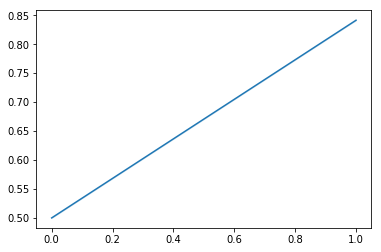

In [17]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
promoters_cdf = scipy.stats.norm.cdf(promoters) # calculate the cdf - also discrete

# plot the cdf
sns.lineplot(x=promoters, y=promoters_cdf)
plt.show()

In [18]:
list(zip(promoters_cdf, promoters))


[(0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.5, 0),
 (0.8413447460685429, 1),
 (0.8413447460685429, 1),
 (0.5, 0),
 (0.5, 0),
 (0

In [19]:
help(scipy.stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (loc) keyword specifies the mean.
 |  The scale (scale) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is::
 |  
 |      norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
 |  
 |  The survival function, ``norm.sf``, is also referred to as the
 |  Q-function in some contexts (see, e.g.,
 |  `Wikipedia's <https://en.wikipedia.org/wiki/Q-function>`_ definition).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location, and scale
 

In [20]:
pdf = scipy.stats.norm.fit(promoters)

In [21]:
pdf
#This gives back the (mean, std)

(0.1694915254237288, 0.375185485104723)

In [22]:
help(scipy.stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (loc) keyword specifies the mean.
 |  The scale (scale) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is::
 |  
 |      norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
 |  
 |  The survival function, ``norm.sf``, is also referred to as the
 |  Q-function in some contexts (see, e.g.,
 |  `Wikipedia's <https://en.wikipedia.org/wiki/Q-function>`_ definition).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location, and scale
 

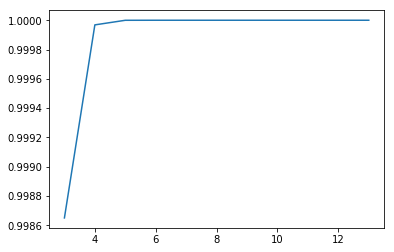

In [23]:
# my_cdf = scipy.stats.norm.cdf(promoters)
#list(zip(my_cdf, promoters))
# pd.Series(my_cdf).describe()
y = list(range(3,14))
norm_cdf = scipy.stats.norm.cdf(y)
norm_cdf
sns.lineplot(x=y, y=norm_cdf)
plt.show()



In [24]:
'''
norm.cdf returns the quantiles, a list of elements (as long as your original list of values),
with the probability of getting that value or less, but it must be normalizing it around 0?
'''
list(zip(norm_cdf, y))



[(0.9986501019683699, 3),
 (0.9999683287581669, 4),
 (0.9999997133484281, 5),
 (0.9999999990134123, 6),
 (0.9999999999987201, 7),
 (0.9999999999999993, 8),
 (1.0, 9),
 (1.0, 10),
 (1.0, 11),
 (1.0, 12),
 (1.0, 13)]

In [25]:
# Let's try ppf: I'm saying a the amount of probaility mass I want to be less than a value, 
# and it gives me the z score value

print(scipy.stats.norm.ppf(0))

print(scipy.stats.norm.ppf(.95))


print(scipy.stats.norm.ppf(.999999))

print(scipy.stats.norm.ppf(1))

-inf
1.6448536269514722
4.753424308817087
inf


In [26]:
# These are my Z-alpha/2, So if I have a standard normal dist (i.e. N(0,1)) and I want to know how many 
# std devs away from the mean my confidence intervals are.

# If I wanted to get the actual values of those, multiply those z-alphas by sigma/square-root of sigma, and add
# or subtract that from the mean
print(scipy.stats.norm.ppf(.975))
print(scipy.stats.norm.ppf(.025))

1.959963984540054
-1.9599639845400545


In [27]:
'''
    Now, back to promoters, I have a sample and a distribution (mean and variance) 
    and I want to know the probability that the mean of that distribution is going to be greater than .2 
    (for example). We'll get to comparison between two distributions later...
    
    I have proportion and mean, that's my x-hat, and I have a variance [p * (1 -p)] and std-dev which is the square
    root of that. I think (sometimes I have to divide that by the square root of the std-dev, but that's only for 
    non-proportions??) But if I subtract .1 from my proportion, and divide by my std-dev, well that should give me
    my z score of where i am
    
    Ok, if I just give norm.cdf a z-score, it gives me back my probability distribution
'''
help(scipy.stats.norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [28]:
scipy.stats.norm.cdf(1.65)

0.9505285319663519

In [29]:
import math
'''
    So I have my promoters mean
    I have my std_dev
'''
promoters_mean = promoters.mean()
promoters_std = promoters.std()
print('mean of promoters', promoters_mean)
print('promoters.std() : ', promoters.std())
print('promoters.var() : ', promoters.var())
print('p * (1 - p) : ', promoters_mean * (1 - promoters_mean))
print('square_root((p * (1 - p))) : ', math.sqrt(promoters_mean * (1 - promoters_mean)))


mean of promoters 0.1694915254237288
promoters.std() :  0.37539763410957805
promoters.var() :  0.14092338369506863
p * (1 - p) :  0.1407641482332663
square_root((p * (1 - p))) :  0.375185485104723


In [30]:
'''
    Hey, what's the probability that my promoters proportion is less than .15??
'''

scipy.stats.norm.cdf((.15 - promoters_mean) / promoters.std())

0.479295284826019